<a href="https://colab.research.google.com/github/UniVR-DH/ADHLab/blob/main/lecture02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experimenting with Word Frequencies


<img src="https://drive.google.com/uc?export=view&id=1m_EMdnI5C826kgqK7r5vB4TXnB0-Wq7W" alt="Intestazione con loghi istituzionali" width="525"/>

| Docente      | Insegnamento | Anno Accademico    |
| :---        |    :----   |          ---: |
| Matteo Lissandrini      | Laboratorio Avanzato di Informatica Umanistica       | 2023/2024   |

## Usual install and basic imports

In [1]:
%pip install wikipedia-api

In [2]:
import gzip
import math
import string
import numpy as np

import regex as re

import matplotlib.pyplot as plt

from collections import Counter

## Declare Wikipedia API Object to download pages

In [3]:
import wikipediaapi
wapi_text = wikipediaapi.Wikipedia('MyProjectName (name@studenti.univr.it)',
                                   'en',
                                   extract_format=wikipediaapi.ExtractFormat.WIKI)

punct_regex = re.compile('[{}]'.format(re.escape(string.punctuation))) # Regex matching any punctuation
space_regex = re.compile(' +') # Regex matching whitespace

### Download two pages, verify the properties of word frequencies

**Compare different pages and the same page in different languages**

In [4]:
page_py = wapi_text.page('New York City')
print("Page - Exists: %s" % page_py.exists())
print(page_py.text[-140:])

page_tokens = space_regex.sub(' ', punct_regex.sub(' ', page_py.text.lower())).strip().split()
print(len(page_tokens))
# Create the bag of words
page_bow = Counter(page_tokens)

print(len(page_bow))

Page - Exists: True
 145,000 NYC photographs at the Museum of the City of New York
"The New New York Skyline (interactive)". National Geographic. November 2015.
16157
3452


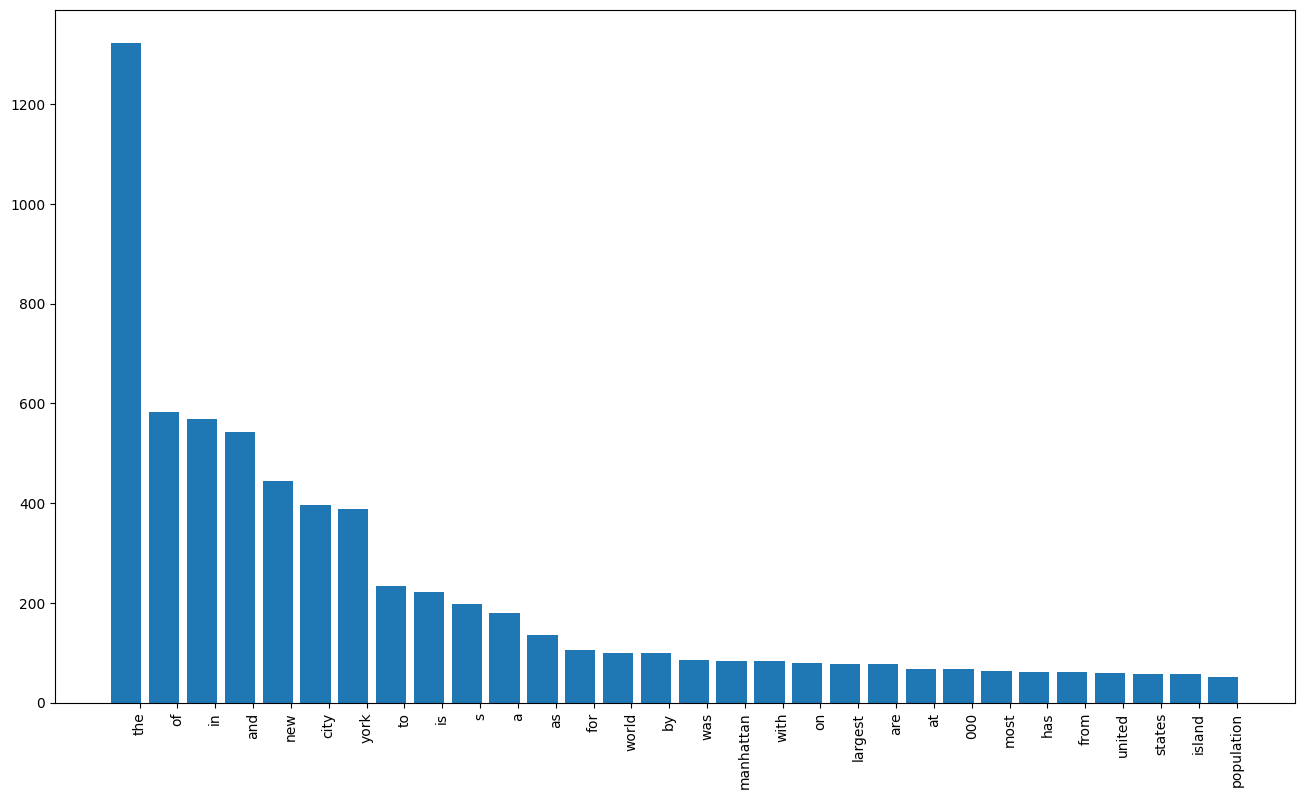

In [5]:
words, counts = zip(*page_bow.most_common(30))
indexes = np.arange(len(words))

bar_width = 0.35

# Prepare figure with bars
plt.figure(figsize=(16,9))
plt.bar(indexes, counts)

# add labels
plt.xticks(indexes + bar_width, words, rotation=90)
plt.show()

In [6]:
print(page_py.langlinks.keys())

dict_keys(['af', 'als', 'am', 'an', 'ang', 'ar', 'arc', 'ary', 'arz', 'as', 'ast', 'awa', 'ay', 'az', 'azb', 'ba', 'ban', 'bar', 'bat-smg', 'bcl', 'be', 'be-x-old', 'bg', 'bh', 'bi', 'bjn', 'bm', 'bn', 'bo', 'br', 'bs', 'bug', 'bxr', 'ca', 'cbk-zam', 'cdo', 'ce', 'ceb', 'ch', 'ckb', 'co', 'crh', 'cs', 'cu', 'cv', 'cy', 'da', 'dag', 'de', 'diq', 'dsb', 'dty', 'ee', 'el', 'eml', 'eo', 'es', 'et', 'eu', 'ext', 'fa', 'fi', 'fiu-vro', 'fj', 'fo', 'fr', 'frp', 'frr', 'fur', 'fy', 'ga', 'gag', 'gan', 'gcr', 'gd', 'gl', 'glk', 'gn', 'got', 'gu', 'gv', 'ha', 'hak', 'he', 'hi', 'hif', 'hr', 'hsb', 'ht', 'hu', 'hy', 'hyw', 'ia', 'id', 'ie', 'ig', 'ik', 'ilo', 'inh', 'io', 'is', 'it', 'ja', 'jam', 'jbo', 'jv', 'ka', 'kaa', 'kab', 'kbp', 'ki', 'kk', 'km', 'kn', 'ko', 'krc', 'ks', 'ku', 'kw', 'ky', 'la', 'lad', 'lb', 'lez', 'lfn', 'li', 'lij', 'lld', 'lmo', 'ln', 'lo', 'lt', 'lv', 'mai', 'map-bms', 'mdf', 'mg', 'mhr', 'mi', 'min', 'mk', 'ml', 'mn', 'mr', 'mrj', 'ms', 'mt', 'mwl', 'my', 'myv', 'mzn',

In [7]:
page_py_it = page_py.langlinks['it']

print(page_py_it.text[-140:])

# Create the bag of words
page_bow_it = Counter(space_regex.sub(' ', punct_regex.sub(' ', page_py_it.text.lower())).strip().split())

print(len(page_bow_it))

zioni, curiosità da New York
 Newyorkfacile.it. - Portale informativo che aiuta gli italiani ad organizzare la propria esperienza a New York
3546


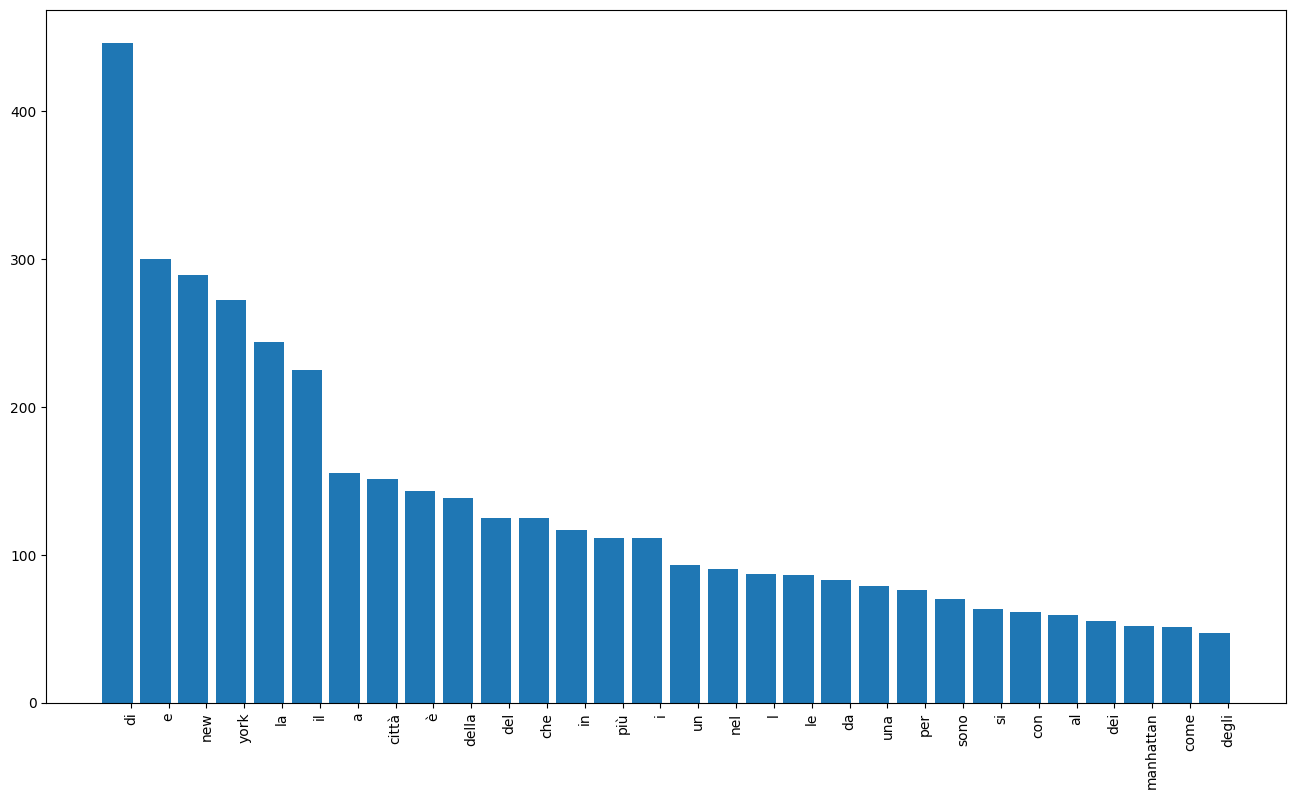

In [8]:
words, counts = zip(*page_bow_it.most_common(30))

indexes = np.arange(len(words))

bar_width = 0.35


plt.figure(figsize=(16,9))
plt.bar(indexes, counts)

# add labels
plt.xticks(indexes + bar_width, words, rotation=90)
plt.show()

In [11]:
# TODO: Try repeat the code above with a new page or a different language





**Predict the normalized frequency of element of rank k using Zipf's law**

Frequency as function of document size

1. How frequent is the most frequent, the second most frequent, and the third most frequent word
2. How frequent is predicted to be using different values of `s`



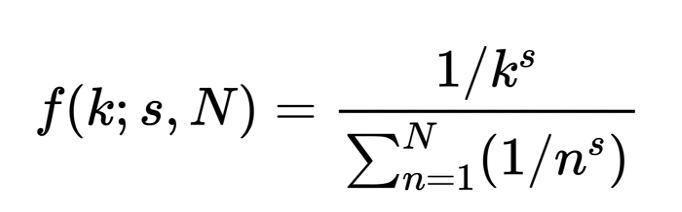

In [9]:
norm_freq_top1 = math.ceil(100*page_bow.most_common()[0][1]/len(page_tokens))
print("Normalized frequency of Most frequent is: {}%".format(norm_freq_top1))

norm_freq_top2 = math.ceil(100*page_bow.most_common(2)[1][1]/len(page_tokens))
print("Normalized frequency of Second Most frequent is {}%".format(norm_freq_top2))

norm_freq_top3 = math.ceil(100*page_bow.most_common(3)[2][1]/len(page_tokens))
print("Normalized frequency of Third Most frequent is {}%".format(norm_freq_top3))

Normalized frequency of Most frequent is: 9%
Normalized frequency of Second Most frequent is 4%
Normalized frequency of Third Most frequent is 4%


In [10]:
N=len(page_tokens)

def f(k,s,N):
  predicted = (1/math.pow(k, s))/sum( 1/math.pow(n, s) for n in range(1,N))
  return predicted

print("Using s=0.5")
print("Predicted Normalized frequency of Most frequent is: {}%".format(100*f(1, 0.5, N)))
print("Predicted Normalized frequency of Second Most frequent is: {}%".format(100*f(2, 0.5, N)))


print("Using s=1")
print("Predicted Normalized frequency of Most frequent is: {}%".format(100*f(1, 1, N)))
print("Predicted Normalized frequency of Second Most frequent is: {}%".format(100*f(2, 1, N)))
print("Predicted Normalized frequency of Third Most frequent is: {}%".format(100*f(3, 1, N)))


print("Using s=2")
print("Predicted Normalized frequency of Most frequent is: {}%".format(100*f(1, 2, N)))
print("Predicted Normalized frequency of Second Most frequent is: {}%".format(100*f(2, 2, N)))

Using s=0.5
Predicted Normalized frequency of Most frequent is: 0.3956383425165176%
Predicted Normalized frequency of Second Most frequent is: 0.2797585548908355%
Using s=1
Predicted Normalized frequency of Most frequent is: 9.739665187913179%
Predicted Normalized frequency of Second Most frequent is: 4.869832593956589%
Predicted Normalized frequency of Third Most frequent is: 3.246555062637726%
Using s=2
Predicted Normalized frequency of Most frequent is: 60.79499774315167%
Predicted Normalized frequency of Second Most frequent is: 15.198749435787917%


In [ ]:
# TODO: Pick a different page text in a different language and verify if the theoretical prediction still holds

**Predict the number of distinct words based on the document length with Heap's law**


1. How many distinct words are there in the first 500, 1000, 5000, 10000, 15000 words
2. Can you plot the curve of the distinct words as document length grows?

In [ ]:
page_tokens = space_regex.sub(' ', punct_regex.sub(' ', page_py.text.lower())).strip().split()
print(len(page_tokens))

distinct_words = set(page_tokens[:500])
print(len(distinct_words))

distinct_words = set(page_tokens[:1000])
print(len(distinct_words))

distinct_words = set(page_tokens[:15000])
print(len(distinct_words))

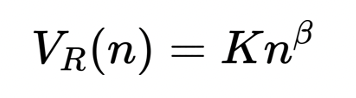

In [ ]:
# This is the Theoretical curve for Heap's law
def test_f(K, n, B):
   return  K*math.pow(n,B)

N = np.linspace(1, 15000)

plt.plot(N, [test_f(K=35,n=x, B=0.4) for x in N], 'r--')
plt.plot(N, [test_f(K=35,n=x, B=0.5) for x in N], 'g:')
plt.plot(N, [test_f(K=35,n=x, B=0.6) for x in N], 'b-')

# TODO: Can you plot the real curve for our document?
# TODO: Can you guess the real K and B ?

plt.show()

In [ ]:
# TODO: Pick a different page text in a different language and verify if the theoretical prediction still holds

## Use Word and Character Frequency to classify text

In [ ]:
def extract_lang_version(_page, languages, remove_punct=False):
  langlinks = _page.langlinks
  language_versions = []

  for k in sorted(langlinks.keys()):
    if k not in languages:
      continue
    v = langlinks[k]
    page_text = v.summary
    if remove_punct:
      page_text = page_text.translate(str.maketrans('', '', string.punctuation))

    language_versions.append((page_text,k))
    # print("%s: %s - %s: %s - %s" % (k, v.language, v.title, v.fullurl, v.summary))
  return language_versions

In [ ]:
train_pages = ['New York City', 'Rome', 'Berlin', 'Buenos Aires', 'Beijing', 'Budapest', 'Canberra', 'Prague', 'Madrid', 'Moscow', 'Vienna', 'Warsaw', 'Oslo', 'Porto']
test_pages = ['Addis Ababa',  'Tom Sawyer', 'Johannes Gutenberg', 'Marcel Proust', 'Google', ' Statoil']
languages = set(['als','en', 'es', 'fo', 'fr', 'da','de', 'hu', 'pl', 'pt', 'ru', 'nl', 'nov'])

In [ ]:
training_set = []
for page_name in train_pages:
  page_py = wapi_text.page(page_name)
  training_set.extend(extract_lang_version(page_py, languages, True))

print("extracted text for {} training pages".format(len(training_set)))

In [ ]:
test_set = []
for page_name in test_pages:
  page_py = wapi_text.page(page_name)
  test_set.extend(extract_lang_version(page_py, languages, True))

print("extracted text for {} test pages".format(len(test_set)))

Testing the application of
[Less is More: Parameter-Free Text Classification with Gzip](https://arxiv.org/pdf/2212.09410.pdf)

In [ ]:
training_set=np.array(training_set)
test_set=np.array(test_set)

macro_accuracy = 0
micro_accuracy = { l:0 for l in languages}

count_l = { l:0 for l in languages}


for (x1 , real) in test_set:
   Cx1 = len(gzip.compress(x1.encode ()))
   distance_from_x1 = []

   for (x2 , _) in training_set:
      Cx2 = len(gzip.compress(x2.encode ()))
      x1x2 = " ".join([x1 , x2])
      Cx1x2 = len(gzip.compress(x1x2.encode ()))
      ncd = (Cx1x2 - min(Cx1 , Cx2)) / max( Cx1 , Cx2 )
      distance_from_x1.append( ncd )

   k=5

   sorted_idx = np.argsort(np.array(distance_from_x1))
   top_k_class = list(training_set[sorted_idx[:k], 1])
   predict_class = max(set(top_k_class) , key=top_k_class.count )

   print("{:4}{:4} ".format(real, predict_class), x1[:30] )
   count_l[real]+=1

   if real == predict_class:
    macro_accuracy+=1
    micro_accuracy[real]+=1


print("\n\n")
print("Macro accuracy", macro_accuracy/len(test_set))

for l in languages:
  if count_l[l] > 0:
    print(l, count_l[l], micro_accuracy[l]/count_l[l])